In [23]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt 
import pandas as pd               # Python data science library
import numpy as np
import re
import sys

from modelclass import model
import modelpattern as pt
import modelmanipulation as mp    # Module for model text processing
from modelmanipulation import explode


# ModelFlow, A library to manage and solve Models


**Problem**:<br>
Stress-test model for banks<br>
Complicated and slow **Excel** workbook 

**Solution**:<br>
Separate specification (at a high level of abstraction) and solution coding.<br> 
Python comes **batteries included**. Data management, text processing, visualization ...

**Implementation** of **minimum workable toolkit** <br>
Create a **transpiler**: A model in a domain specific Business logic language:<br>
`frml <> loss = probability_of_default * loss_given_default * exposure(-1)`<br>
 ==> python model code<br>
`values[row,0]=values[row,1]*values[row,2]*values[row-1,3]`<br>
Create **solver** and **utility** functions. 

**Transpiler**<br>
A tokenizer using Pythons Regular expression library (re)<br>
Analyze logical structure using the Networkx library<br>
Generate Python Code 

## Expand and refactor
To suit the needs of the different models thrown at the toolkit.

**Specify very large (or small) models** as concise and intuitive equations. The user don't have to do the household chores and can concentrate on the economic content. 

**Large models**. 1 million equation and more can be handled. 

**Agile model development** Model are specified at a high level of abstraction and are processed fast. Experiments with model specification are agile and fast. 

**Onboarding models and combining from different sources**. Recycling and combining models specified in different ways: Excel, Latex, Dynare, Python or other languages. Python's ecosystem makes it possible to transform many different models into ModelFlow models or to wrap them into functions which can be called from ModelFlow models. 

**Onboarding data from different sources**. Pythons Pandas Library and other tools are fast and efficient for data management.

**A rich set of analytical tools for model and result analytic** helps to understand the model and its results. 

**The user can extend and modify the tools** to her or his needs. All code is in Python and the core is quite small.       

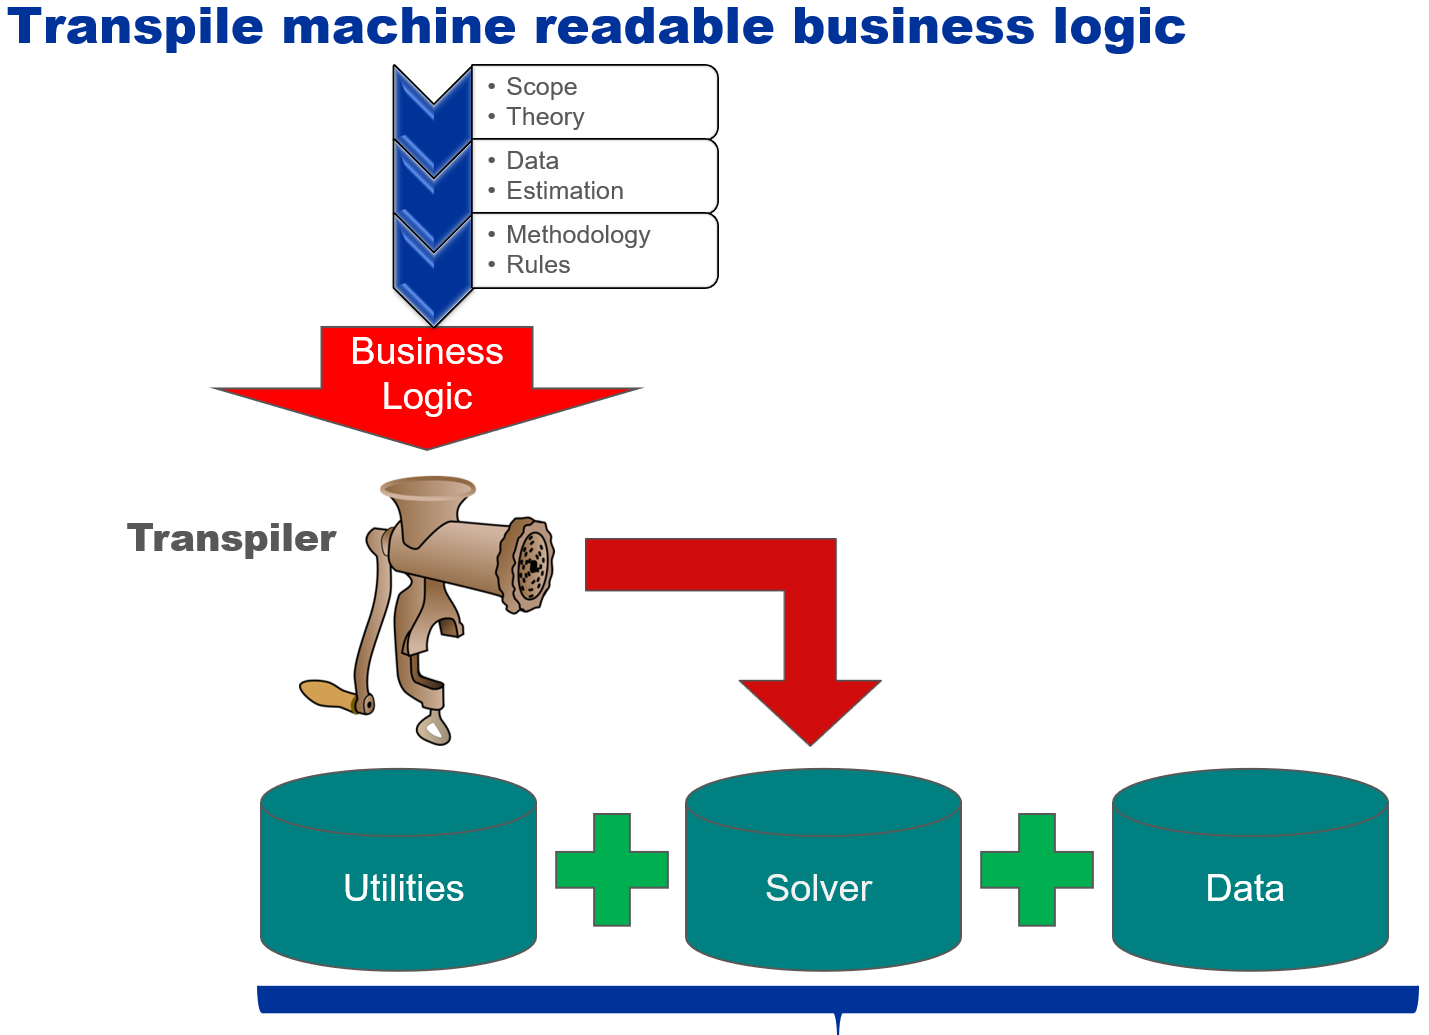

## What is a Model in ModelFlow
ModelFlow is created to handle models. The term [**model**](https://en.wikipedia.org/wiki/Model) can mean a lot of different concepts. 

The scope of models handled by ModelFlow is discrete models which is the same for each time frame, can be formulated as mathematical equations and *can* have lagged and leaded variables. This allows the system to handle quite a large range of models.

A model with:

 - $\textbf n$ number of endogeneous variables
 - $\textbf k$ number of exogeneous variables 
 - $\textbf u$ max lead of endogeneous variables
 - $\textbf r$ max lag of endogeneous variables 
 - $\textbf s$ max lag of exogeneous variables 
 - $t$ time frame (year, quarter, day second or another another unit)
 
can be written in two ways, **normalized** or **un-normalized** form

### Normalized model
Each endogenous variable is on the left hand side one time - and only one time.<br>
\begin{eqnarray}
y_t^1 & = & f^1(y_{t+u}^1...,y_{t+u}^n...,y_t^2...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
y_t^2 & = & f^2(y_{t+u}^1...,y_{t+u}^n...,y_t^1...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
\vdots \\
y_t^n & = & f^n(y_{t+u}^1...,y_{t+u}^n...,y_t^1...,y_{t}^{n-1}...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^r,x..._{t-s}^1...,x_{t-s}^k)
\end{eqnarray}


Many stress test, liquidity, macro or other models conforms to this pattern. Or the can easily be transformed to thes pattern. 

Written in matrix notation where  $\textbf{y}_t$ and $\textbf{x}_t$ are vectors of endogenous/exogenous  variables for time t<br>

\begin{eqnarray}  
\textbf{y}_t & = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}


ModelFlow allows variable (the  𝐱 'es and the  𝐲 'es the to be scalars, matrices, arrays or pandas dataframes.

### Un-normalized form
Some models can not easy be specified as normalized formulas. Especially   models with equilibrium  conditions can more suitable be specified in the more generalized un-normalized form.

Written in matrix notation like before:

\begin{eqnarray}  
\textbf{0}& = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}

The number of endogenous variables and equations should still be the same.

#### Model solution 
For a normalized model:

\begin{eqnarray}  
\textbf{y}_t & = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-r})     
\end{eqnarray}

a solution is  $\textbf{y}_t^*$ so that:


\begin{eqnarray}  
\textbf{y}_t^* & = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t^* \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-r})     
\end{eqnarray}

For the un-normalized model:
\begin{eqnarray}  
\textbf{0}& = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}


a solution $\textbf{y}_t^*$ is 

\begin{eqnarray}  
\textbf{0} & = & \textbf{G}(\textbf{y}_{t+u} \cdots \textbf{y}_t^* \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-r})     
\end{eqnarray}

Some models can have more than one solution. In this case the solution can depend on the starting point of the solution algorithm. 

## Model derivatives 

Both for solving and for analyzing the causal structure of a model it can be useful to define different matrices of derivatives for a model $\textbf F()$ like this:

\begin{align}  
\textbf{A}_t & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_t^T}  \hphantom{\hspace{5 mm} i=1, \cdots , r}   
 &\hspace{1 mm}\mbox{Derivatives with respect to current endogeneous variables} \\ \\
\textbf{E}_t^i & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_{t-i}^T } \hspace{5 mm} i=1, \cdots , r  &\hspace{1 mm}\mbox{  Derivatives with respect to lagged endogeneous variables  } \\  \\
\textbf{D}_t^j & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_{t+j}^T } \hspace{5 mm} j=1, \cdots , u  &\hspace{1 mm}\mbox{  Derivatives with respect to leaded endogeneous variables  } \\  \\
\textbf{F}_t^k & = & \frac{\partial \textbf{F}}{\partial \textbf{x}_{t-i} ^T} \hspace{5 mm} k=0, \cdots , s  &\hspace{1 mm}\mbox{  Derivatives with respect to current and lagged exogeneous variables  }\\ 
\end{align}

For un-normalized models the derivative matrices are just the dervatives of $\textbf G$ instead of $\textbf F$

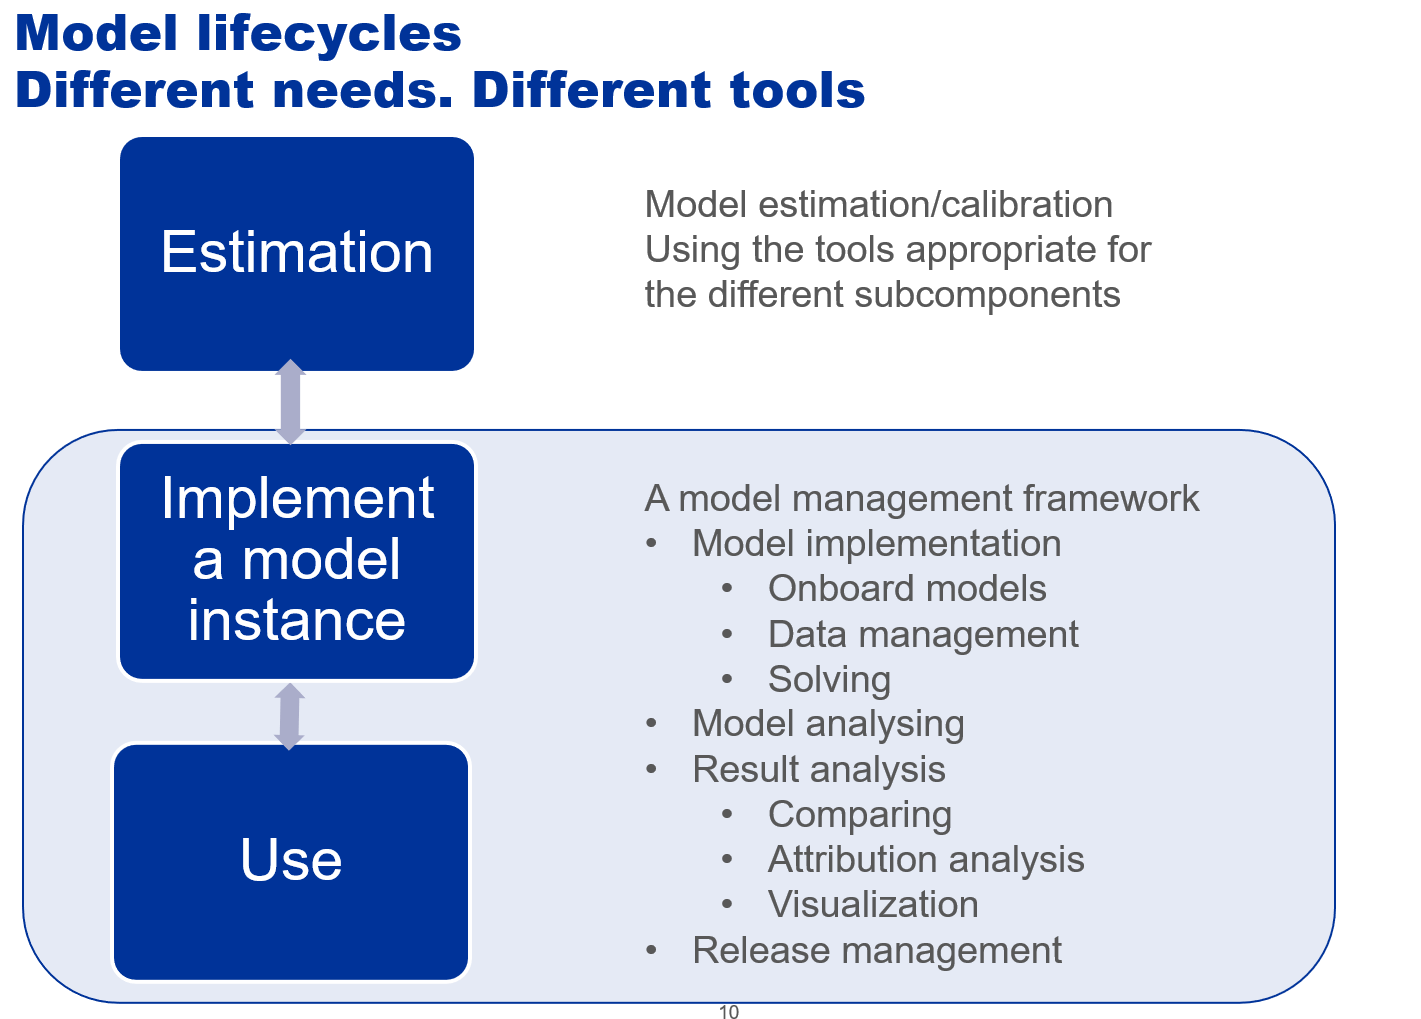

## Model solutions

There are numerous methods to solve models (systems) as mentioned above. ModelFlow can apply 3 different types of model solution methods: 

 1. If the model has **no contemporaneous feedback**, the equations can be sorted 
 [Topological](https://en.wikipedia.org/wiki/Topological_sorting) and then the equations can be calculated in the topological order. This is the same as a spreadsheet would do.  
 2. If the model has **contemporaneous feedback** model is solved with an iterative method. Here variants of well known solution methods are used: 
     1. [Gauss-Seidle](https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method) (**Gauss**) which can handle large systems, is fairly robust and don't need the calculation of derivatives
     2. [Newthon-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method) (**Newton**) which requires the calculation of derivatives and solving of a large linear system but typically converges in fewer iterations. 
 
Nearly all of the models solved by ModelFlow don't contain leaded endogenous variables. Therefor they can be solved one period at a time. For large sparse nonlinear models Gauss works fine. It solves a model quite fast and we don't need the additional handiwork of handling derivatives and large linear systems that Newton methods require. Moreover many models in question do not have smooth derivatives. The order in which the equation are calculated can have a large impact on the convergence speed. 

For some models the Newton algorithm works better. Some models are not able to converge with Gauss-Seidle other models are just faster using Newton. Also the ordering of equations does not matter for the convergence speed. 

However some models like FRB/US and other with **rational expectations** or **model consistent expectations** contains leaded endogenous variables. Such models typical has to be solved as one system for for all projection periods. In this case, the Gauss variation [Fair-Taylor](https://fairmodel.econ.yale.edu/rayfair/pdf/1983A.PDF) or Stacked-Newton Method.  The **stacked Newton** methods can be used in all cases, but if not needed, it will usually use more memory and be slower. 

|Newton|Gauss|
|:-:|:-:|
|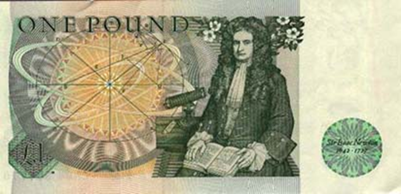|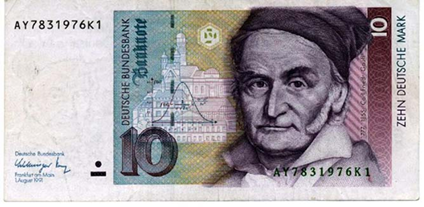|

| Model  | No contemporaneous feedback | Contemporaneous feedback | Leaded variables |
| --- | --- | --- |--- | 
|Normalized | Calculate | Gauss or <br> Newton  | Fair Taylor or <br> Stacked Newton|
|Un-normalized | Newton | Newton | Stacked Newton |

# Implementation of solving algorithms in Python
Solving a model entails a number of steps:

1. Specification of the model 
2. Create a dependency graph. 
2. Establish a solve order and separate the the model into smaller sub-models
2. Create a python function which can evaluating $f_i(y_1^{k},\cdots,y_{i-1}^{k},y_{i+1}^{k-1},\cdots,y_{n}^{k-1},z)$
3. If needed, create a python function which can evaluate the Jacobimatrices: $\bf{A,E,D}$  or $\bf{\bar A,\bar E,\bar D}$ 
3. Apply a solve function using the elements above to the data. 

 

### Normalized model


#### Calculation, No contemporaneous feedback

In systems with no lags each period can be solved in succession
The equations has to be evaluated in a logical (topological sorted) order. 

Let $z$ be all predetermined values: all exogenous variable and lagged endogenous variable.

Order the $n$ endogeneous variables in topological order.
    
For each time period we can find a solution by

for $i$ = 1 to $n$ 

>$y_{i}^{k} = f_i(y_1^{k},\cdots,y_{i-1}^{k},y_{i+1}^{k-1},\cdots,y_{n}^{k-1},z)$


#### The Gauss-Seidel algorithm. Models with contemporaneous feedback
The Gauss-Seidel algorithm is quite straight forward. It basically iterate over the formulas, until convergence. 

let:<br>
$z$ be all predetermined values: all exogenous variable and lagged endogenous variable.<br>
$n$ be the number of endogenous variables.<br>
$\alpha$ dampening factor which can be applyed to selected equations


   
For each time period we can find a solution by doing Gauss-Seidel iterations: 

for $k = 1$ to convergence

>for $i$ = 1 to $n$ 
>
>>$y_{i}^{k} = (1-\alpha) * y_{i}^{{k-1}} + \alpha f_i(y_1^{k},\cdots,y_{i-1}^{k},y_{i+1}^{k-1},\cdots,y_{n}^{k-1},z)$

#### The Newton-Raphson algorithme. Models with contemporaneous feedback

Let $\bf z$ be a vector all predetermined values: all exogenous variable and lagged endogenous variable.

For each time period we can find a solution by doing Newton-Raphson iterations:<br>

for $k = 1$ to convergence<br>

>$\bf y = \bf {F(y^{k-1},z) }$
>
>$\bf y^{k} =  \bf y - \alpha \times  \bf{(A-I)}^{-1} \times ( \bf {y - y^{k-1} })$

The expression: $\bf{(A-I)}^{-1}\times  ( \bf {y - y^{k-1} })$ is the same as the solution to: 

$\bf {y- y^{k-1} } = \bf (A-I) \times \bf x$

This problem can be solved much more efficient than performing $\bf{(A-I)}^{-1}\times  ( \bf {y - y^{k-1} })$

The Scipy library provides a number of solvers to this linear set of equations. There are both solvers using  factorization and iterative methods, and there are solvers for dense and sparce matrices. All linear solvers  can easily be incorporated into ModelFlows Newton-Raphson nonlinear solver.

#### Stacked Newton-Raphson all  periods in one go. Models with both leaded and lagged endogeneous variable

If the model has leaded endogenous variables it can in general not be solved one time period at a time. We have to solve the model for all time frames as one large model. 

$$\bf{\bar A} =\begin{bmatrix} 
		\bf{A_1}   & \bf{D_1^1} & \bf{D_1^2} & \bf{0}     &\bf{0}      &\bf{0}      &\bf{0}      &\bf{0}  \\
        \bf{E_2^1} & \bf{A_2}   & \bf{D_2^1} & \bf{D_2^2} &\bf{0}      &\bf{0}      &\bf{0}      &\bf{0} \\       
        \bf{E_3^2} & \bf{E_3^1} & \bf{A_3}   & \bf{D_3^1} & \bf{D_3^2} &\bf{0}      &\bf{0}      &\bf{0} \\       
        \bf{E_4^3} & \bf{E_4^2} & \bf{E_4^1} & \bf{A_4}   & \bf{D_4^1} & \bf{D_4^2} &\bf{0}      & \bf{0} \\       
        \bf{0}     & \bf{E_5^3} & \bf{E_5^2} & \bf{E_5^1} & \bf{A_5}   & \bf{D_5^1} & \bf{D_5^2} &\bf{0}\\       
        \bf{0}     & \bf{0}     & \bf{E_6^3} & \bf{E_6^2} & \bf{E_6^1} & \bf{A_6}   & \bf{D_6^1} & \bf{D_6^2}\\       
        \bf{0}     & \bf{0}     & \bf{0}     & \bf{E_7^3} & \bf{E_7^2} & \bf{E_7^1} & \bf{A_7}   & \bf{D_7^1} \\       
        \bf{0}     & \bf{0}     & \bf{0}     & \bf{0}     & \bf{E_8^3} & \bf{E_8^2} & \bf{E_8^1} & \bf{A_8} \\       
\end{bmatrix} \bar y = \begin{bmatrix}\bf{y_1}\\\bf{y_2}\\\bf{y_3}\\ \bf{y_4} \\\bf{y_5} \\\bf{y_6} \\ \bf{y_7} \\ \bf{y_8} \end{bmatrix} \bar F = \begin{bmatrix}\bf{F}\\\bf{F}\\\bf{F}\\ \bf{F} \\\bf{F} \\\bf{F} \\ \bf{F} \\ \bf{F} \end{bmatrix}$$

Now the solution algorithme looks like this. 

Again let $\bf z$ be a vector all predetermined values: all exogenous variable and lagged endogenous variable.
for $k = 1$ to convergence

>$\bf{\bar y} = \bf {\bar F(\bar y^{k-1},\bar z) }$

>$\bf {\bar y^{k}} =  \bf{\bar y} - \alpha \times \bf{(\bar A-I)}^{-1}\times ( \bf {\bar y - \bar y^{k-1} })$

Notice that the model $\bf F$ is the same for all time periods.

However as time can be an exogeneous variable, the result of F can depend on time. This allows 
us to specify terminal conditions. 

The update frequency of $\bf{\bar A}$ and $\alpha$ and the value of $\alpha$ can be set to manage the speed and stability of the algorithme. 

Again we solve the problem: $$( \bf {\bar y - \bar y^{k-1} }) = \bf{(\bar A-I)}\times \bf x $$ instead of inverting  $\bf{A}$. 

## Create a model instance which calculates the Jacobi matrices.
The derivatives of all formulas with respect to all endogenous variables is needed.    

First step is to specifying a model in the business logic language which calculate all the non-zero elements<br>
In ModelFlow this can be done by **symbolic**, by **numerical differentiation** or by a combination.  


The formula for calculating  $\dfrac{\partial{numerator }}{{\partial denominator(-lag)}}$ is written as:                             

\< numerator  \>\_\_p\_\_\< denominator >\_\_lag\_\_\< lag\> = derivative expression

Just another instance of a ModelFlow model class. 

### A small Solow model to show the construction of the Jacobi matrix. 
An example can be helpful<br> 
First a small model is defined - in this case a solow growth model: 

In [25]:
fsolow = '''\
Y         = a * k**alfa * l **(1-alfa) 
C         = (1-SAVING_RATIO)  * Y 
I         = Y - C 
diff(K)   = I-depreciates_rate * K(-1)
diff(l)   = labor_growth * L(-1) 
K_i= K/L '''
msolow = model.from_eq(fsolow)
print(msolow.equations)

FRML <> Y         = A * K**ALFA * L **(1-ALFA)  $
FRML <> C         = (1-SAVING_RATIO)  * Y  $
FRML <> I         = Y - C  $
FRML <> K=K(-1)+(I-DEPRECIATES_RATE * K(-1))$
FRML <> L=L(-1)+(LABOR_GROWTH * L(-1))$
FRML <> K_I= K/L  $


### Create some data and solve the model 

In [26]:
N = 100
df = pd.DataFrame({'L':[100]*N,'K':[100]*N})
df.loc[:,'ALFA'] = 0.5
df.loc[:,'A'] = 1.
df.loc[:,'DEPRECIATES_RATE'] = 0.05
df.loc[:,'LABOR_GROWTH'] = 0.01
df.loc[:,'SAVING_RATIO'] = 0.05
msolow(df,max_iterations=100,first_test=10,silent=1);

### Create an differentiation instance of the model
Use symbolic differentiation when possible else use numerical differentiation.  

In [79]:
from modelnewton import newton_diff
msolow.smpl(3,5);  # we only want a few years 

### Symbolic differentiation 

In [28]:
newton = newton_diff(msolow)
print(newton.diff_model.equations) 

FRML  <> C__p__Y___lag___0 = 1 - SAVING_RATIO   $
FRML  <> I__p__C___lag___0 = -1   $
FRML  <> I__p__Y___lag___0 = 1   $
FRML  <> K__p__I___lag___0 = 1   $
FRML  <> K__p__K___lag___1 = 1 - DEPRECIATES_RATE   $
FRML  <> K_I__p__K___lag___0 = 1/L   $
FRML  <> K_I__p__L___lag___0 = -K/L**2   $
FRML  <> L__p__L___lag___1 = LABOR_GROWTH + 1   $
FRML  <> Y__p__K___lag___0 = A*ALFA*K**ALFA*L**(1 - ALFA)/K   $
FRML  <> Y__p__L___lag___0 = A*K**ALFA*L**(1 - ALFA)*(1 - ALFA)/L   $


### Numerical differentiation 

In [29]:
newton2 = newton_diff(msolow,forcenum=1)
print(newton2.diff_model.equations)

FRML  <> C__p__Y___lag___0 = (((1-SAVING_RATIO)*(Y+0.0025))-((1-SAVING_RATIO)*(Y-0.0025)))/0.005   $
FRML  <> I__p__C___lag___0 = ((Y-(C+0.0025))-(Y-(C-0.0025)))/0.005   $
FRML  <> I__p__Y___lag___0 = (((Y+0.0025)-C)-((Y-0.0025)-C))/0.005   $
FRML  <> K__p__I___lag___0 = ((K(-1)+((I+0.0025)-DEPRECIATES_RATE*K(-1)))-(K(-1)+((I-0.0025)-DEPRECIATES_RATE*K(-1))))/0.005   $
FRML  <> K__p__K___lag___1 = (((K(-1)+0.0025)+(I-DEPRECIATES_RATE*(K(-1)+0.0025)))-((K(-1)-0.0025)+(I-DEPRECIATES_RATE*(K(-1)-0.0025))))/0.005   $
FRML  <> K_I__p__K___lag___0 = (((K+0.0025)/L)-((K-0.0025)/L))/0.005   $
FRML  <> K_I__p__L___lag___0 = ((K/(L+0.0025))-(K/(L-0.0025)))/0.005   $
FRML  <> L__p__L___lag___1 = (((L(-1)+0.0025)+(LABOR_GROWTH*(L(-1)+0.0025)))-((L(-1)-0.0025)+(LABOR_GROWTH*(L(-1)-0.0025))))/0.005   $
FRML  <> Y__p__K___lag___0 = ((A*(K+0.0025)**ALFA*L**(1-ALFA))-(A*(K-0.0025)**ALFA*L**(1-ALFA)))/0.005   $
FRML  <> Y__p__L___lag___0 = ((A*K**ALFA*(L+0.0025)**(1-ALFA))-(A*K**ALFA*(L-0.0025)**(1-ALFA

### Display the full stacked matrix
To make the sparcity clear all zero values are shown as blank 


In [30]:
stacked_df = newton.get_diff_df_tot()
stacked_df.applymap(lambda x:f'{x:,.2f}' if x != 0.0 else ' ')

per          3                                         4                       \
var          C      I      K    K_I      L      Y      C      I      K    K_I   
per var                                                                         
3   C    -1.00                               0.95                               
    I    -1.00  -1.00                        1.00                               
    K            1.00  -1.00                                                    
    K_I                 0.01  -1.00  -0.01                                      
    L                                -1.00                                      
    Y                   0.51          0.49  -1.00                               
4   C                                              -1.00                        
    I                                              -1.00  -1.00                 
    K                   0.95                               1.00  -1.00          
    K_I                                                           0.01  -1.00   
    L                                 1.01                                      
    Y                                                             0.51          
5   C                                                                           
    I                                                                           
    K                                                             0.95          
    K_I                                                                         
    L                                                                           
    Y                                                                           

per                        5                                     
var          L      Y      C      I      K    K_I      L      Y  
per var                                                          
3   C                                                            
    I                                                            
    K                                                            
    K_I                                                          
    L                                                            
    Y                                                            
4   C            0.95                                            
    I            1.00                                            
    K                                                            
    K_I  -0.01                                                   
    L    -1.00                                                   
    Y     0.49  -1.00                                            
5   C                  -1.00                               0.95  
    I                  -1.00  -1.00                        1.00  
    K                          1.00  -1.00                       
    K_I                               0.01  -1.00  -0.01         
    L     1.01                                     -1.00         
    Y                                 0.51          0.49  -1.00

Python gives access to very efficient sparse libraries. The [Scipy library](https://scipy.org/scipylib/index.html) utilizes the [Intel® Math Kernel Library](https://software.intel.com/en-us/mkl).

### The results can also be displayed

In [82]:
newton.show_diff_latex()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                     |   3 |   4 |   5 |
|:------------------------------------|----:|----:|----:|
| $\frac{\partial I_t}{\partial C_t}$ |  -1 |  -1 |  -1 |
| $\frac{\partial I_t}{\partial Y_t}$ |   1 |   1 |   1 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                         |    3 |    4 |    5 |
|:----------------------------------------|-----:|-----:|-----:|
| $\frac{\partial L_t}{\partial L_{t-1}}$ | 1.01 | 1.01 | 1.01 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                     |    3 |    4 |    5 |
|:------------------------------------|-----:|-----:|-----:|
| $\frac{\partial C_t}{\partial Y_t}$ | 0.95 | 0.95 | 0.95 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                        |           3 |           4 |           5 |
|:---------------------------------------|------------:|------------:|------------:|
| $\frac{\partial K\_I_t}{\partial K_t}$ |  0.0097059  |  0.0096098  |  0.00951466 |
| $\frac{\partial K\_I_t}{\partial L_t}$ | -0.00943472 | -0.00925799 | -0.0090867  |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                     |        3 |        4 |        5 |
|:------------------------------------|---------:|---------:|---------:|
| $\frac{\partial Y_t}{\partial K_t}$ | 0.507135 | 0.509412 | 0.511639 |
| $\frac{\partial Y_t}{\partial L_t}$ | 0.492966 | 0.490762 | 0.488626 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                         |    3 |    4 |    5 |
|:----------------------------------------|-----:|-----:|-----:|
| $\frac{\partial K_t}{\partial I_t}$     | 1    | 1    | 1    |
| $\frac{\partial K_t}{\partial K_{t-1}}$ | 0.95 | 0.95 | 0.95 |

## Speeding up solving through Just In Time compilation (Numba)
Python is an interpreted language. So slow

**Firstly**, use the matrix extensions if possible. This will force the use of the highly optimized routines in the 
Numpy library. 

**Secondly** Use the 
**Numba** Just In time Compiler.<br>
Experience with a Danish model (1700 equations) shows a speedup from 5 million floating point 
operations per second (MFlops) to 800 MFlops. But compilation takes time.  

Also experiments with the **Cython** library has been performed. This library will translate the Python code to C++ code. Then a C++ compiler can compile the code and the run time will be improved a lot. 

## Specification of model in Business Logic Language
The Business logic Language is a Python like language, where each function $f_i$ from above is specified as:

```
FRML <options> <left hand side> = <right hand side> $ ... 
```

The ```<left hand side>``` should not contain transformations, but can be a tuple which match the ```<right hand side>```. A  \$ separates each formular.

Time is implicit, so $var_t$ is written as ```var```, while $var_{t-1}$ is written as ```var(-1)``` and $var_{t+1}$ is written as ```var(+1)```. Case does not matter. everything is eventual made into upper case. 

It is important to be able to create short and expressive models, therefor. Stress test models should be able to handle many bank and sectors without repeating text. So on top of the **Business logic language**. there is a **Macro Business Logic language**. The primary goal of this is to allow (conditional) looping and normalization of formulas.   


# Onboarding a model 

We want to present a model to the transpiler, so it can create a model instance including a python function which can solve/calculate the model. The primary method for this is to formulate the model in a Business logic Language. 

The purpose of the Business logic language is to enable a clear and
concise specification of the models at hand.

A *macro model* can flow through a *macro-processor* which returns *business logic*. This is then processed by
transpiler to create a python function which can solve the model.

The macro-processer performs text processing:

-   Normalize formulas

-   Decorate formulas

-   Expand arrays

-   Expand matrices

-   Unlooping do-loops

The inspiration is the modeling language of venerable programs like
TSP, Eviews, Troll and SAS/ETS combined with the rules of Python.

If you launch this notebook as Jupyter notebook, you can play around with the business logic language.

There are three types of statements:

1.  Formula statement:\
    Defines transformation of variables in the Dataframe

2.  List statement:\
    Defines lists and associated sub lists. Lists can be
    used to define repetitive items and to define mappings

3.  DO/END DO statements\
    Defines repetitive formulas in which the content of list are
    interpolated

# Onboarding a model 
**Python has incredible strong tools both for interacting with other systems like Excel and Matlab, and for text processing.** This allows for *recycling* of models from different sources and make them live together (hopefully happy). Some of the sources, from which models has been recycled are: 

- Latex 
    - Model written in Latex - with some rules to allow text processing. 
- Eviews
- Excel 
    - Calculation model from Excel workbook  
    - Grabbing coefficients from excel workbooks 
- Matlab 
    - Wrapping matlab models into python functions, which can be used in ModelFlow  
    - Grabbing coefficients from matlab .mat files. 
- Aremos models 
- TSP models 

Grabbing models and transforming them to Business logic language usually requires a tailor-made Python program. However in the ModelFlow folder there are different examples of such grabbing. 

# From model equations to solution

The core of ModelFlow is a transpiler. The purpose of the transpiler
is two fold.

 - To convert  a **Business Logic Language** model to a python function. This function can then evaluates the model, and thus be called from the solving routine. Both Gauss-Seidle and Newton-Raphson solvers need as input a function to which can evaluate  the model.   
 
 - To analyze the model. Find the dependencies **graph** of the formulas. The depencency graph can be used for analyzing the causal structure of a model. This is used to speed up solving and to enable model and model result analytic.  

Python come batteries included, so a number of powerful tools are available. Therefore, it is not necessary to design a full-fledged compiler/interpreter in order to solve a model. Some of the tough jobs are outsourced to the Python ecosystem. 

## The model structure

The logical structure of a model is useful for several reasons. 

The structure of **contemporaneous endogenous variable** is used to establish the calculation sequence and identify simultaneous systems (strong graphcomponents). 

The structure of a model can be seen as a directed graph. All variables are node in the graph. 
If a variable $b$ is on the right side of the formula defining variable $a$ there is an edge from $b$ to $a$. 

### First we define the nodes (vertices) of the dependency graph.

The set of nodes is the set of relevant variables. Actually we want to look 
at **two dependency graphs**: one containing *all variables*, 
and one only containing *endogenous contemporaneous variable* (the $y^j_t$'s). So we define two sets S and E:

**All endogenous, exogenous, contemporaneous and lagged variables**

$S=\{y^j_{t-i}|j=1..n,i=1..r   \} \cup \{x^j_{t-i}|j=1..k,i=1..s   \}$ 

**Contemporaneous endogenous variables**

$E=\{y^j_{t}|j=1..n    \}$ 


Naturally:
$E \subseteq S$

### Then we define the edges of the dependency graph.  
Again two sets are relevant: 

**From all variables to contemporaneous endogenous variables**

$T = \{(a,b) | a \in E, b \in S\}$ a is on the right side of b 

### And we can construct useful dependency graphs
The we can define a graph TG which defines the data dependency of the model:

$TG = (S,T)$ The graph defined by nodes S and edges T.

TG can be used when exploring the dependencies in the model. This is useful for the user when drilling down the results. 

However for preparing the solution a smaller graph has to be used. When solving the model for a specific period both exogenous and lagged endogenous variables are predetermined. Therefor we define the the dependency graph for contemporaneous endogenous variables:

$TE = (E,T_e)$ The graph defined by nodes $S$ and edges $T_e$.

TE is used to determine if the model is simultaneous or not. 

If the model is not simultaneous, then TE have no cycles, that is, it is a 
Directed Acyclical Graph (DAG). Then we can find an order in which the formulas can
be calculated. This is called a topological order. 

The topological order is a linear ordering of nodes (vertices) such that for every edge (v,u), node v comes before u in the ordering. 

A topological order is created by doing a topological sort of TE.   

If TE, the dependency graph associated with F is **not** a Directed Acyclical Graph (A DAG).
Then F has contemporaneous feedback and is simultaneous. Or - in Excel speak - the 
model has circular references. And we need to use an iterative methods to solve the model. Sometime a model contains several simultaneous blocks. Then each block is a strong element of the graph. Each formula which is not part of a simultaneous bloc is in itself a strong element. 

A condensed graph where each strong element is condensed to a node is a DAG. 
So the condensed graph have a topological order. This can be used when solving the model. 

The dependency graphs are constructed, analyzed and manipulated through the **Networkx** Python library. 

####  Total dependency graphs
This shows $TG$ mentioned above. 

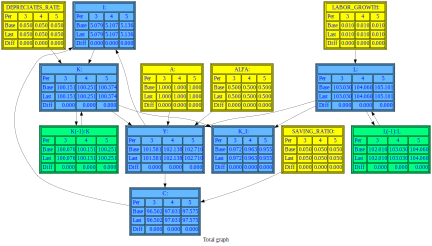

In [81]:
msolow.drawmodel(title='Total graph',all=1)

### The dependency graph for contemporaneous endogenous variables (TE)

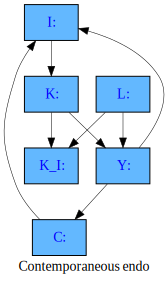

In [33]:
msolow.drawendo(title='Contemporaneous endo')

#### And the adjacency matrix of the graph
The graph can also be represented as a adjacency matrix. This is a is a square matrix A. $A_{i,j}$  is one when there is an edge from node i to node j, and zero when there is no edge.

If the graph is a DAG the adjacency matrix, and the elements are in a topological order, is a lover triangular matrix. 

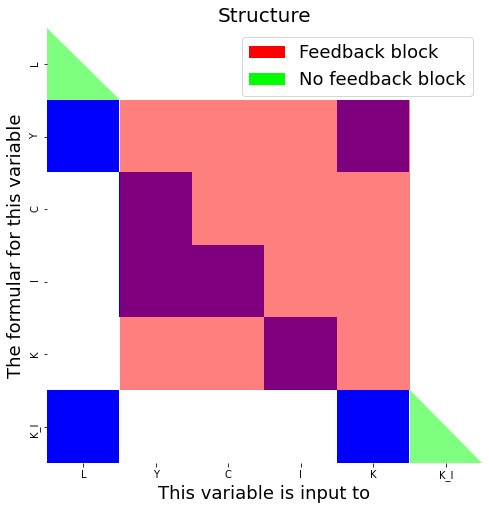

In [34]:
a = msolow.plotadjacency(size=(8,8))

## Solution ordering 

### For normalized models: 
For a model **without contemporaneous feedback**, the topoligical sorted order is then used as calculating order. 

For a model **with contemporaneous feedback** and no leaded variables, ModelFlow divides a model into three parts. A recursive **prolog** model, a recursive **epilog** model, the rest is the simultaneous **core** model. Inside the core model the ordering of the equations are preserved.  It may be that the core model contains several strong componens, which each could be solved as a simultanous system, however it is solved as one simultanous system.  

Only the core model is solved as a simultaneous system. The prolog model is calculated once before the solving og the simultaneous system, the epilog model is calculated once after the solution of the simultanous system. 
For most models this significantly reduce the computational burden of solving the model. 

For Gauss type solution the ordering of the equations in the core model can be important for the speed of convergence. 

For a model with leaded variables the model is stacked, and a all  equations are created equal. For some models it could probably be useful split the model, but it has not been needed yes. 

The cell below displays the variables in the three parts.

In [35]:
# The preorder
print(f'The prolog variables {msolow.preorder}')
print(f'The core   variables {msolow.coreorder}')
print(f'The epilog variables {msolow.epiorder}')

The prolog variables ['L']
The core   variables ['Y', 'C', 'I', 'K']
The epilog variables ['K_I']


# Some Model manipulation capabilities  

## Model inversion aka Target/instruments or Goal Seek 
In ordet to answer questions like: 

- How much capital has to be injected in order to maintain a certain GDP level in a stressed scenario? 
- How much loans has to be shredded by the banks in order to maintain a minimum level of capital (slim to fit)? 
- How much capital has to be injected in order to keep all bank above a certain capital threshold ?

The model instance is capable to **"invert"** a model. To use the terminology of Tinbergen(1955) that is to calculate the value of some exogenous variables - **the instruments** which is required in order to achieve a certain target value for some endogenous variables - **the targets**. 

To use the terminology of Excel it is a goal/seek functionality with multiple cells as goals and multiple cells as targets.  

The problem can be thought as follows: From the generic description of a model: $\textbf{y}_t= \textbf{F}(\textbf{x}_{t})$. Here $\textbf{x}_{t}$ are all predetermined variables - lagged endogenous and all exogenous variables. 

In some models the result depends on the level of exogenous variables with a lag. For instance in a disease spreading model, the *number of infected* on a day depends on the *probability of transmission* some days before. If the *probability of transmission* is the instrument and the *number of infected* is the target. Therefor it can be useful to allow a **delay**, when finding the instruments. In this case we want to look at  $\textbf{y}_t= \textbf{F}(\textbf{x}_{t-delay})$ 

Think of a condensed model ($\textbf{G}$) with a few endogenous variables($\bar{\textbf{y}}_t$):
the targets and a few exogenous variables($\bar{\textbf{x}}_{t-delay}$): the instrument variables. All the rest of the predetermined variables are fixed:  
$\bar{\textbf{y}}_t= \textbf{G}(\bar{\textbf{x}}_{t-delay})$

If we invert G we have a model where  instruments are functions of targets:
$\bar{\textbf{x}_{t-delay}}= \textbf{G}^{-1}(\bar{\textbf{y}_{t}})$. Then all we have to do is to find
$\textbf{G}^{-1}(\bar{\textbf{y}_{t}})$

### And how to solve for the instruments 
For most models $\bar{\textbf{x}}_{t-delay}= \textbf{G}^{-1}(\bar{\textbf{y}_{t}})$ do not have a nice close form solution. However it can be solved numerically. We  turn to Newton–Raphson method.

So $\bar{\textbf{x}}_{t-delay}= \textbf{G}^{-1}(\bar{\textbf{y}_{t}^*})$ will be found using :

for $k$ = 1 to convergence  

>$\bar{\textbf{x}}_{t-delay,end}^k= \bar{\textbf{x}}_{t-delay,end}^{k-1}+ \textbf{J}^{-1}_t \times (\bar{\textbf{y}_{t}^*}-
\bar{\textbf{y}_{t}}^{k-1})$

>$\bar{\textbf{y}}_t^{k}= \textbf{G}(\bar{\textbf{x}}_{t-delay}^{k})$

convergence: $\mid\bar{\textbf{y}_{t}^*}-
\bar{\textbf{y}_{t}}
\mid\leq \epsilon$

Now we just need to find: 

$\textbf{J}_t = \frac{\partial \textbf{G} }{\partial \bar{\textbf{x}}_{t-delay}}$

A number of differentiation methods can be used (symbolic, automated or numerical). ModelFlow uses numerical differentiation, as it is quite simple and fast.

$\textbf{J}_t \approx \frac{\Delta \textbf{G} }{\Delta \bar{\textbf{x}}_{t-delay}}$

That means that we should run the model one time for each instrument, and record the 
effect on each of the targets, then we have $\textbf{J}_t$ 

In order for $\textbf{J}_t$ to be invertible there has to be the same number of targets and instruments. 

However, each instrument can be a basket of exogenous variable. They will be adjusted in fixed proportions. This can be useful for instance when using bank leverage as instruments. Then the leverage instrument can consist of several loan types.  

You will notice that the level of $\bar{\textbf{x}}$ is updated (by  $\textbf{J}^{-1}_t \times (\bar{\textbf{y}_{t}^*}-
\bar{\textbf{y}_{t}}^{k-1})$) in all periods from $t-delay$ to $end$, where $end$ is the last timeframe in the dataframe. This is useful for many applications including calibration of disease spreading models and in economic models, where the instruments are level variable (i.e. not change variables). If this is not suitable, it can be changed in a future release. 

The target/instrument functionality is implemented in the python class `targets_instruments` specified in **ModelFlows** `modelinvert` module.  

### An example
The workflow is as follow:

1.  Define the targets
2.  Define the instruments 
3.  Create a target_instrument class istance
4. Solve the problem 

Step one is to define the targets. This is done by creating a dataframe where the target values are set. In this case it can be done like this. 

In [36]:
msolow.basedf

,L,K,ALFA,A,DEPRECIATES_RATE,LABOR_GROWTH,SAVING_RATIO,K_I,Y,I,C
0,100.000000,100.000000,0.5,1.0,0.05,0.01,0.05,0.000000,0.000000,0.000000,0.000000
1,101.000000,100.025580,0.5,1.0,0.05,0.01,0.05,0.990352,100.511609,5.025580,95.486029
2,102.010000,100.076226,0.5,1.0,0.05,0.01,0.05,0.981043,101.038487,5.051924,95.986562
3,103.030100,100.151443,0.5,1.0,0.05,0.01,0.05,0.972060,101.580575,5.079029,96.501546
4,104.060401,100.250762,0.5,1.0,0.05,0.01,0.05,0.963390,102.137821,5.106891,97.030930
...,...,...,...,...,...,...,...,...,...,...,...
95,257.353755,185.913822,0.5,1.0,0.05,0.01,0.05,0.722406,218.736417,10.936821,207.799596
96,259.927293,187.661027,0.5,1.0,0.05,0.01,0.05,0.721975,220.857924,11.042896,209.815028
97,262.526565,189.428077,0.5,1.0,0.05,0.01,0.05,0.721558,223.002024,11.150101,211.851922
98,265.151831,191.215119,0.5,1.0,0.05,0.01,0.05,0.721153,225.168912,11.258446,213.910466


In [54]:
target = msolow.basedf.loc[50:,['L','K']]+[30,10]
target.head()

,L,K
50,194.463182,135.971544
51,196.107814,136.933236
52,197.768892,137.911105
53,199.446581,138.905161
54,201.141047,139.915414


Then we have to provide the instruments. This is **a list of list of tuples**. 
-  Each element in the outer list is an instrument. 
-  Each element in the inner list is an instrument variable 
-  Each element of the tuple contains a variable name and the associated impulse $\Delta$. 

The $\Delta variable$ is used in the numerical differentiation. Also if one instrument contains several variables, the proportion of each variable will be determined by the relative $\Delta  variable$. 

For this experiment the inner list only contains one variable. 

In [55]:
instruments = [ [('LABOR_GROWTH',0.001)] , [('DEPRECIATES_RATE',0.001)]]

Now we run the eksperiment 

For models which are relative linear we don't need to update  𝐉𝑡  for each iteration and time frame. As our small toy model is nonlinear, the jacobi matrix has to be updated frequently. This is controlled by the nonlin=True option below.

In [63]:
result = msolow.invert(msolow.lastdf,target,instruments,nonlin=True)
result

,L,K,ALFA,A,DEPRECIATES_RATE,LABOR_GROWTH,SAVING_RATIO,K_I,Y,I,C
0,100.000000,100.000000,0.5,1.0,0.050000,0.010000,0.05,0.000000,0.000000,0.000000,0.000000
1,101.000000,100.025580,0.5,1.0,0.050000,0.010000,0.05,0.990352,100.511609,5.025580,95.486029
2,102.010000,100.076226,0.5,1.0,0.050000,0.010000,0.05,0.981043,101.038487,5.051924,95.986562
3,103.030100,100.151443,0.5,1.0,0.050000,0.010000,0.05,0.972060,101.580575,5.079029,96.501546
4,104.060401,100.250762,0.5,1.0,0.050000,0.010000,0.05,0.963390,102.137821,5.106891,97.030930
...,...,...,...,...,...,...,...,...,...,...,...
95,287.354078,195.913986,0.5,1.0,0.052197,0.008948,0.05,0.681786,237.269220,11.863461,225.405759
96,289.927741,197.661148,0.5,1.0,0.052178,0.008956,0.05,0.681760,239.389745,11.969487,227.420258
97,292.526671,199.428290,0.5,1.0,0.052157,0.008964,0.05,0.681744,241.532801,12.076640,229.456161
98,295.152154,201.215281,0.5,1.0,0.052139,0.008975,0.05,0.681734,243.698838,12.184942,231.513896


And do the result match the target?

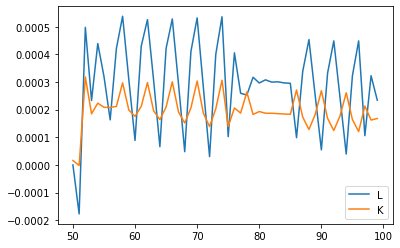

In [64]:
(result-target).loc[50:,['L','K']].plot();

So we got results for the target variable very close to the target values. 

In [74]:
msolow.smpl(90,100)  # we only want a few years 

msolow.basedf.Y

0       0.000000
1     100.511609
2     101.038487
3     101.580575
4     102.137821
         ...    
95    218.736417
96    220.857924
97    223.002024
98    225.168912
99    227.358789
Name: Y, Length: 100, dtype: float64

In [66]:
msolow.lastdf.Y

0       0.000000
1     100.511609
2     101.038487
3     101.580575
4     102.137821
         ...    
95    237.269220
96    239.389745
97    241.532801
98    243.698838
99    245.887818
Name: Y, Length: 100, dtype: float64

### Delays
Sometime the effect on targets of instruments are delayed. This goes for instance in covid-19 SEIR polulation contagio models. Where the effect of policy on hospitalisation will show up after some time. This us achieved by the option:**delay=#of timeframes#**

### Shortfall targets
Above the target for each target variable is a certain values. Sometime we we need targets being above a certain shortfall value. In this case an instrument should be used to make the achieve the target threshold only if the target is belove the target. This is activated by an option:**shortfall=True**.

This feature can be useful calculating the amount of deleverage needed for banks to achieve a certain threshold of capital. 

## Attribution / Explanation 

Experience shows that it is useful to be able to explain the difference between the result from two runs. 
The first level of understanding the difference is to look at selected formulas and find out, how much each input variables accounts for. 
The second level of understanding the difference is to look at the attribution of the 
exogenous variables to the results of the model.  

If we have:

$y = f(a,b)$

and we have two solutions where the variables differs by $\Delta y, \Delta a, \Delta b$

How much of $\Delta y$ can be explained by $\Delta a$ and $\Delta b$ ?

Analytical the attributions $\Omega a$ and $\Omega b$ can  be calculated like this: 

$\Delta y = \underbrace{\Delta a \dfrac{\partial {f}}{\partial{a}}(a,b)}_{\Omega a} + 
\underbrace{\Delta b \dfrac{\partial {f}}{\partial{b}}(a,b)}_{\Omega b}+Residual$

ModelFlow will do a numerical approximation of $\Omega a$ and $\Omega b$. This is done by looking at the two runs of the model:

\begin{eqnarray}  
y_0&=&f(a_{0},b_{0}) \\
y_1&=&f(a_0+\Delta a,b_{0}+ \Delta b)
\end{eqnarray}

So $\Omega a$ and $\Omega b$ can be determined:

\begin{eqnarray}  
\Omega f_a&=&f(a_1,b_1 )-f(a_1-\Delta a,b_1) \\
\Omega f_b&=&f(a_1,b_1 )-f(a_1,b_1-\Delta  b)
\end{eqnarray}



And: 

\begin{eqnarray}
residual = \Omega f_a + \Omega f_b -(y_1 - y_0) 
\end{eqnarray}
If the model is fairly linear, the residual will be small. 

### Formula attribution
Attribution analysis on the formula level is performed by the method **.dekomp**. 

This method utilizes that two attributes .basedf and .lastdf containing the first and the last run are contained in the model instance. Also all the formulas are contained in the instance. Therefore a model, just with one formula - is created. Then experiments mentioned above is run for each period and each right hand side variable. 

In [75]:
msolow.current_per

RangeIndex(start=90, stop=100, step=1)

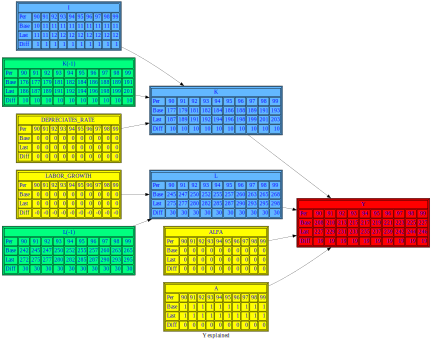

In [78]:
_ = msolow.Y.explain(up=2)

If the baseline dataframe is set to the lagged variable of the last dataframe. We can 
calculate the attributions to the change of results from time period to time period. 

### Walk the explanations. 
Sometime we want to trace the attributions to variables in higher in the dependency graph. 

Using the dependency graph TG, we can walk up the graph, and do an attribution calculation for each of the parents, grand parents and so on. 

It should be mentioned that for *lagged* endogenous variable an attribution calculation will not be performed.  

So we use the **.explain** method. 

The result will also be made into a vector graphic both in .pdf and .svg format. This allows for zooming into the tree, even if there are many leaves.   

In [ ]:
_ = mmodel.D1.explain(up=2)

### Model Attribution

At the model level we start by finding which exogenous variables have changed between two runs.

In [68]:
difdf = msolow.exodif()
difdf

,DEPRECIATES_RATE,LABOR_GROWTH
50,-0.072516,0.184236
51,0.003187,-0.001544
52,0.003160,-0.001526
53,0.003138,-0.001518
54,0.003113,-0.001503
55,0.003088,-0.001492
56,0.003064,-0.001480
57,0.003040,-0.001465
58,0.003015,-0.001453
59,0.002992,-0.001443


Now we make a dictionary of experiments where the key is the name of the
experiment and the value of each entry is the variable to investigate in the experiment 

In [69]:
experiments = {e : [e]  for e in difdf.columns}
experiments 

{'DEPRECIATES_RATE': ['DEPRECIATES_RATE'], 'LABOR_GROWTH': ['LABOR_GROWTH']}

Then we can let the model run through each experiment and record a number of summary
variable.  

In [72]:
impact = md.attribution(msolow,experiments,start=2019,end=2021,summaryvar=['Y*'])
impact

NameError: name 'md' is not defined

In [ ]:
impact['C',2021]

In [ ]:
for sumaryvar in impact.index:
    mv.attshow(md.GetAllImpact(impact, sumaryvar),tshow=0,t=False,annot=True,dec=1,
               title='Impact on: '+sumaryvar,size=(3,3),showsum=True,head=1,tail=1)

When the results are displayed, they can be filtered, sliced and diced in a number of ways. 

For a model of the EBA stress test the number of changed exogenous variable can be large. Using a dictionary to contain the experiments allows us to create experiments where all variable for each country are analyzed, or each macro variable for all countries are analyzed. 

Also it is possible to use aggregated sums - useful for looking at impact on PD's. Or just the last time period - useful for looking at CET1 ratios. 

If there are many experiments, data can be filtered in order to look only at the variables with an impact above a certain threshold. 

The is also the possibility to anonymize the row and column names and to randomize
the order of rows and/or columns - useful for bank names. 

## Optimization 
Using the convex optimization package CVXOPT, which is part of the Anaconda Python distribution a range of optimization problems can be solved. One example is the standard mean variance problem. 

### A mean variance problem

If we look at a fairly general mean variance optimization problem which has been adopted to banks it looks like this:  

\begin{eqnarray}  
\mathbf x & &\mbox{Position in each asset(+)/liability(-) type}\\
\mathbf x & &\mbox{Position in each asset(+)/liability(-) type}\\
\mathbf \Sigma & &\mbox{Covariance matrix} \\
\mathbf r & &\mbox{Return vector}\\
\lambda & &\mbox{Risk aversion}\\
\mathbf{riskweights}& &\text{Vector of risk weights, liabilities has riskweight = 0}\\
Capital& &\mbox{Max of sum of risk weighted assets}\\
\mathbf{lcrweights}& &\text{Vector of LCR weights, liabilities has lcrweight = 0}\\
LCR& &\text{Min of sum of lcr weighted assets}\\
\mathbf{leverageweight}&&\text{Vector of leverage weights, liabilities has leverageweight = 0}\\
Equity&&\mbox{Max sum of leverage weighted positions}\\
Budget&&\mbox{initial sum of the positions}\\
\end{eqnarray}

\begin{eqnarray}
\mbox{minimize:}  & \lambda \mathbf x^T \mathbf \Sigma \mathbf x - (1-\lambda) \mathbf r^T \mathbf x & \mbox{If }\lambda \mbox{ = 1 minimize risk, if } \lambda\mbox{ = 0 maximize return }\\
\mbox{subject to:} & \mathbf x \succeq \mathbf{x^{min}} &\mbox{Minimum positions}\\ 
                   & \mathbf x \preceq \mathbf{x^{max}} &\mbox{Maximum positions}\\ 
                   & \mathbf{riskweights}^T\mathbf x \leq Capital &\mbox{Risk weighted assets <= capital}\\ 
                   & \mathbf{lcrweights}^T\mathbf x \geq LCR &\mbox{lcr weighted assets >= LCR target}\\ 
                   & \mathbf{leverageweight}^T\mathbf x \leq equity &\mbox{leverage weighted assets <= equity}\\ 
                   & \mathbf 1^T\mathbf x = Budget & \mbox{Sum of positions = B}
\end{eqnarray}


### The mean variance problem in the business language language 

In the business logic language this problem can be specified like this:

``` 
positions =  mv_opt(msigma,return,riskaversion, budget, 
            [[risk_weights] , [-lcr_weights] , [leverage_weights]],
              [capital, -lcr , equity] ,min_position,max_position) 
```

Where the arguments are appropriately dimensioned CVX matrices and vectors. 

For a more elaborate example there is an special notebook on the subject of optimization.

Also it should be mentioned that there is an expansion of the basic problem taking transaction cost into account. 


## Symbolic model differentiation 
ModelFlow have the capability to calculate expressions for differentiation of the formulas 
of a model. This is done by the Python symbolic math library **Sympy**. After finding the 
expressions for the differential coefficients they can be evaluated - just like the model. Based on these a linearized 
version of the model can be constructed. 

We want to be able to find he Jacobi matrices:

\begin{eqnarray}  
\textbf{A} & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_t^T} \\ \\
\textbf{E}_i & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_{t-i}^T } \hspace{5 mm} i=1, \cdots , s \\ \\
\textbf{F}_j & = & \frac{\partial \textbf{F}}{\partial \textbf{x}_{t-j} ^T} \hspace{5 mm} j=0, \cdots , r  
\end{eqnarray}

These matrices can be useful when finding stability properties. 

Now lets differentiate our toy model 

In [ ]:
mdif.modeldiff(mmodel)

Now we can display the expressions for the differential coefficient - and the values in a selected time (row), in this case 2018.

In [ ]:
mdif.display_all(mmodel,mmodel.basedf,2018)

Also the matrices of differential coefficient (Jacobi matrices) for each lag, can be calculated

In [ ]:
# calculate 
matdir = mdif.calculate_allmat(mmodel,mmodel.basedf,2018)
# Display 
for l,m in matdir.items():
    print(f'Lag:{l} \n {m} \n')

We can carve out the matrices only for the endogenous variables. The A and E matrices mentioned above 
can be extracted like this: 

In [ ]:
for l,m in matdir.items():
    endomat = m.loc[:,[c for c in m.columns if c in mmodel.endogene]]
    print(f'Lag:{l} \n {endomat} \n')

A word of caution. 

Symbolic math can take time if the model is large. So it is advisable to test this feature on a small model which 
captures the essence before moving to a large model. 

Also the Sympy library will only handle functions and expressions that it knows.  

## Stability
Jacobi matrices can be used to evaluate the stability properties of the model. To do this we first look at a linearized version of the model. We are interested in the effect of shocks to the system. Will shocks be 
damped or will they be amplified. 

To calculate the effect of small perturbations the model can be linearized around a solution

\begin{eqnarray*}  
\Delta y_t & = & A \Delta y_t + E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F_0 \Delta x_t  + \cdots +F_s \Delta x_{t-s} \\
I\Delta y_t-A \Delta y_t & = &  \hphantom{A \Delta y_t +}E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F _0\Delta x_t   + \cdots +F_s \Delta x_{t-s} \\  
(I-A)\Delta y_t & =  &  \hphantom{A \Delta y_t +}E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F_0 \Delta x_t  + \cdots +F_s \Delta x_{t-s} \\ 
\Delta y_t & =  & (I-A)^{-1}(E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F_0 \Delta x_t  + \cdots +F_s \Delta x_{t-s}) \\
\Delta y_t           & =  & (I-A)^{-1}E_1 \Delta y_{t-1} + \cdots +(I-A)^{-1}E_r \Delta y_{t-r} + (I-A)^{-1}F_0 \Delta x_t  + \cdots +(I-A)^{-1}F_s \Delta x_{t-s} \\
\end{eqnarray*}



\begin{eqnarray*}  
y_t & = & F(y_t \cdots y_{t-r},x_t \cdots x_{t-s})     \\
\Delta y_t & =  & (I-A)^{-1}E_1 \Delta y_{t-1} + \cdots +(I-A)^{-1}E_r \Delta y_{t-r} + (I-A)^{-1}F_0 \Delta x_t  + \cdots +(I-A)^{-1}F_s \Delta x_{t-s}
\end{eqnarray*}

where:

\begin{eqnarray*}
A & = & \frac{\partial F}{\partial y_t^T} \\ \\
E_i & = & \frac{\partial F}{\partial y_{t-i}^T } \hspace{5 mm} i=1, \cdots , r\\  \\
F_j & = & \frac{\partial F}{\partial x_{t-j} ^T} \hspace{5 mm} j=0, \cdots , s\\  \\
\end{eqnarray*}



We have

\begin{eqnarray*}  
y_t & = & F(y_t \cdots y_{t-r},x_t \cdots x_{t-s})     \\
\Delta y_t & =  & (I-A)^{-1}E_1 \Delta y_{t-1} + \cdots +(I-A)^{-1}E_r \Delta y_{t-r} + (I-A)^{-1}F_0 \Delta x_t  + \cdots +(I-A)^{-1}F_s \Delta x_{t-s} \\
\end{eqnarray*}

A rather messy problem. It can be made more simple. This is done by making a new linear model only incorporating 
variables with one lag. 

This is done the standard way by introducing new variables: $y^{1 }_{t}=y_{t-1}$,
$y^{2}_{t}=y^1_{t-1}$,  and $y^{3}_{t}=y^2_{t-1}$ Using theese transformed variables, 
a system with max lag of 3 can e rewritten like this: 

$\underbrace{
\left[\begin{matrix}
\Delta y^{3} _{t}\\\Delta y^{2 }_{t}\\\Delta y^{1 }_{t}\\\Delta y_{t}
\end{matrix}\right]}_{\Delta \bar y_t }=
\underbrace {\left[\begin{matrix}{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\{0} & {0} & {0} & A\end{matrix}\right]}_{\bar A} 
\underbrace{\left[\begin{matrix}
\Delta y^{3} _{t}\\\Delta y^{2 }_{t}\\\Delta y^{1 }_{t}\\\Delta y_{t}
\end{matrix}\right]}_{\Delta \bar y_t} +
\underbrace{\left[\begin{matrix}{0} & \mathbb{I} & {0} & {0}\\{0} & {0} & \mathbb{I} & {0}\\{0} & {0} & {0} & \mathbb{I}\\E_{3} & E_{2} & E_{1} & E\end{matrix}\right]}_{\bar E}
\underbrace{\left[\begin{matrix}
\Delta y^{3} _{t-1}\\\Delta y^{2 }_{t-1}\\\Delta y^{1 }_{t-1}\\\Delta y^{ }_{t-1}
\end{matrix}\right]}_{\Delta \bar y_{t-1}} +
\underbrace {\left[\begin{matrix}{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\F_{3} & F_{2} & F_{1} & F_{0}\end{matrix}\right]}_{\bar F}
\underbrace   {\left[\begin{matrix}\Delta x_{t-3}\\\Delta x_{t-2}\\\Delta x_{t-1}\\\Delta x_{t\hphantom{-1}}\end{matrix}\right]}_{\bar x_t}$



So this expression:

$\Delta y_t  =  A \Delta y_t + E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F_0 \Delta x_t  + \cdots +F_r \Delta x_{t-r}$


Has been simplified to this expression :

$\Delta \bar y_t  =  \bar A \Delta \bar y_t + \bar E \Delta \bar y_{t-1} + \bar F \Delta \bar x_t$


It can be solved, so we only get the: $\Delta \bar y_t$ on the left hand side:

$\Delta \bar y_t  =   (I-\bar A)^{-1}\bar E \Delta \bar y_{t-1} + (I-\bar A)^{-1}\bar F \Delta \bar x_t$

$\mbox{This expression :} \\\Delta \bar y_t  =   (I-\bar A)^{-1}\bar E \Delta \bar y_{t-1} + (I-\bar A)^{-1}\bar F \Delta \bar x_t$ 

Which can be written this way:

$\underbrace{\left[\begin{matrix}
\Delta y^{3} _{t}\\\Delta y^{2}_{t}\\\Delta y^{1}_{t}\\\Delta y_{t}
\end{matrix}\right]}_{\Delta \bar y_t}=
\underbrace{\left[
\begin{matrix}{0} & \mathbb{I} & {0} & {0}\\{0} & {0} & \mathbb{I} & {0}\\{0} & {0} & {0} & \mathbb{I}\\\left(\mathbb{I} - A\right)^{-1} E_{3} & \left(\mathbb{I} -A\right)^{-1} E_{2} & \left(\mathbb{I}- A\right)^{-1} E_{1} & \left(\mathbb{I}- A\right)^{-1} E\end{matrix}
\right]}_{ \mbox{companion matrix}=(I-\bar A)^{-1}\bar E}
\underbrace{\left[\begin{matrix}
\Delta y^{3} _{t-1}\\\Delta y^{2 }_{t-1}\\\Delta y^{1 }_{t-1}\\\Delta y^{ }_{t-1}
\end{matrix}\right]}_{\Delta \bar y_{t-1}}
+ \\
\underbrace{\left[\begin{matrix}{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\\left(\mathbb{I} - A\right)^{-1} F_{3} & \left(\mathbb{I} - A\right)^{-1} F_{2} & \left(\mathbb{I} - A\right)^{-1} F_{1} & \left(\mathbb{I} - A\right)^{-1} F_{0}\end{matrix}\right]}_{(I-\bar A)^{-1}\bar F} 
\underbrace{\left[\begin{matrix}\Delta x_{t-3}\\\Delta x_{t-2}\\\Delta x_{t-1}\\\Delta x_{t\hphantom{-1}}\end{matrix}\right]}_{\Delta \bar x_t}$

So now we have a linear model with only one lag. For this kind of models the dynamic behavior can be 
evaluated by looking at the eigenvalues $e_t$ of $((I-\bar A)^{-1}\bar E )$ 

If all $\lvert e_t \lvert < 1$ the system will converge. If at least one of the eigenvalues is larger than one, the system will explode. $e_t$ can are complex numbers. If at least one $e_t$ has an imaginary part the system will oscillate - either dampened if all $\lvert e_t \lvert < 1$ or exploding if one $\lvert e_t \lvert > 1$.

The eigenvalues and associated eigenvectors can be found by the function mdif.get_eigen which will be used below.

### Example: Samuelson multiplier accelerator model 
To illustrate the feature this small classic model is created in a function which will display the results and a polar plot of the complex eigenvalues. 

Then experiment with different parameter values are performed in order to establish if shocks are 
amplified or dampened and if shocks will induce oscillations or not. 

In [83]:
def geteigen(mul,acc,years=100,show=False):
    '''Function which creates a Samuelson Multiplier accelerator model, runs it
    and alculates the eigenvalues for the compaignion matrix in order to 
    evaluate stability. 
    
    A polar plot of the compex eigenvalues and graphs of the endogenous variables can 
    be displayes '''
    
    fam   = f'''
    frml <>  y = c+i $ 
    frml <I> c = {mul} * y(-1) $
    frml <>  i = {acc} * (c-c(-1)) + im $'''

    mma = mc.model(fam,modelname = 'Accelerator multiplicator model')
    df = pd.DataFrame([[1000,200]]*years,index=range(2018,2018+years),columns=['Y','IM'])
    start = mc.model(f'c = {mul} * y(-1)')(df,silent=True) # Generate lagged variables for c 
    base  = mma(start,silent=True)     # Solve the model 

    compeig=mdif.get_eigen(mma,base,2021)       # find the eigenvalues and eigenvectors 
    if show:
        mdif.eigplot(compeig[0])        # show the eigenvalues 
        _ = mma[['Y','C','I']].plot()  # Show the solution
        
    return  

#### Stability  
All eigenvalues shorter than 1 and no imaginary parts 

In [84]:
geteigen(mul=0.5,acc=0,years=30,show=1)

NameError: name 'mc' is not defined

#### Explosion 
At least one eigenvalues above 1 no imaginary part

In [ ]:
geteigen(mul=0.9,acc=2,years=30,show=1)

#### Exploding oscillations
At least one eigenvalue above 1 and imaginary parts

In [ ]:
geteigen(mul=0.6,acc=2,years=30,show=1)

#### Perpetual oscillations 
Eigenvalues at 1 with imaginary part

In [ ]:
geteigen(mul=0.5,acc=2,years=30,show=1)

#### Dampened oscillations 
All eigenvalues below 1 and imaginary parts

In [ ]:
geteigen(mul=0.7,acc=1,years=30,show=1)

Using this feature. ModelFlow can be used to analyze how different feedback parameters will impact stability.
Of cause it requires that the model is differentiable, and for large models the analysis can take time and a lot of RAM.  

# Summary
ModelFlow allows easy implementation of models in Python, Which is a powerful and agile language. ModelFlow leverage on the rich ecosystem of Python in order to: 

-  Separates the specification of a model and the code which solves the model. So the user can concentrate on the economic and not the implementation of the model.
-  Can include user specified Python function in the model definition. 
-  Can solve very large models
-  Can solve simultaneous models.
-  Keeps tab on the dependencies of the formulas. This allows for easy Tracing of results. 
-  Can perform model inversion (goal seek) with multiple targets and instruments
-  Can attribute changes in results to input variables. Both for individual formulas and the complete model 
-  Can include optimizing behavior 
 
The purpose of this notebook has been to give a broad introduction to model management using ModelFlow. 
Using the tool requires some knowledge of python. The required knowledge depends on the complexity of the model. So ModelFlow can be used in Python training.  

To get more in-depth knowledge there is a Sphinx based documentation of the library. There you can find the 
calling conventions and documentation of all elements.

All suggestions and recommendations are welcome 

# Literature:


Aho, Lam, Sethi, Ullman (2006), Compilers: Principles, Techniques, and
Tools (2nd Edition), Addison-Wesley

Berndsen, Ron (1995), [Causal ordering in economic
models](https://kundoc.com/pdf-causal-ordering-in-economic-models-.html),
Decision Support Systems 15 (1995) 157-165

Danmarks Nationalbank (2004), [MONA -- a quarterly model of Danish
economy](http://www.nationalbanken.dk/da/publikationer/Documents/2003/11/mona_web.pdf)

Denning, Peter J. (2006), [The Locality
Principle](http://denninginstitute.com/pjd/PUBS/locality_2006.pdf),
Chapter in *Communication Networks and Systems* (J Barria, Ed.).
Imperial College Press

Gilli, Manfred (1992), [Causal Ordering and Beyond, International
Economic Review, Vol. 33, No. 4 (Nov., 1992), pp.
957-971](http://www.jstor.org/stable/2527152?seq=1#page_scan_tab_contents)

McKinney, Wes (2011),[pandas: a Foundational Python Library for Data Analysis and
Statistics,] Presented at
PyHPC2011](http://www.scribd.com/doc/71048089/pandas-a-Foundational-Python-Library-for-Data-Analysis-and-Statistics)

Numba (2015) documentation,
[http://numba.pydata.org/numba-doc/0.20.0/user/index.html](http://numba.pydata.org/numba-doc/0.20.0/user/index.html%20)

Pauletto, G. (1997), [Computational Solution of Large-Scale
Macroeconometric
Models](http://link.springer.com/book/10.1007%2F978-1-4757-2631-2),
ISBN 9781441947789

E. Petersen, Christian & A. Sims, Christopher. (1987). Computer Simulation of Large-Scale Econometric Models: Project Link. International Journal of High Performance Computing Applications (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.853.6387&rep=rep1&type=pdf)

Tinberger, Jan (1956), Economic policy: Principles and Design,
Amsterdam,


# Footnotes
$^1$: The author has been able to draw on experience creating software
    for solving the macroeconomic models ADAM in Hansen Econometric.

$^2$: In this work a number of staff in Danmarks Nationalbank made
    significant contributions: Jens Boldt and Jacob Ejsing to the
    program. Rasmus Tommerup and Lindis Oma by being the first to
    implement a stress test model in the system.

$^3$: In ECB Marco Gross, Mathias Sydow and many other collegues has been of great help. 

$^4$: The system has benefited from discussions with participants in meetings at: IMF, Bank of Japan, Bank of England, FED Board, Oxford University, Banque de France, Single Resolution Board 

$^5$: Ast stands for: [Abstract Syntax
    Tree](https://en.wikipedia.org/wiki/Abstract_syntax_tree)

$^6$: Re stands for[: Regular
    expression](https://en.wikipedia.org/wiki/Regular_expression)